# IART- TP6- Iris Flower (2-2)

5.3 Iris flower extended data set –Classification using different Algorithms
Continuing with the Iris dataset, suppose that we have Iris already identified in the 3 classes but
now we have also the Iris packed in different types of packages: “Simple – 0”, “Gift – 1” and “Luxury
– 3”. We also have a new variable “price” with three possibilities: “Low”, “Medium”, “High”. 

We have now a different classification problem in which we want to predict the “price” classification
based on the remaining characteristics: sepal_length_cm, sepal_width_cm, petal_length_cm,
petal_width_cm, iris_type, and package.

a) Create a new notebook and start by importing the needed libraries.


b) Read the data from the CSV file and check the data using the head(), describe(), and other Pandas commands.

c) Using only the attribute sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm, fit a simple decision tree model to the data.

d) Analyse the accuracy, precision, recall and f-measure achieved.


e) Create and analyse a confusion matrix of the results.


f) Using only the attribute sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm, fit a simple nearest neighbor model to the data.


g) Analyse the accuracy, precision, recall and f-measure achieved.


h) Fit distinct models such as decision trees, SVM and neural networks to the data and try different configuration parameters.


i) Analyse the accuracy, precision, recall and f-measure achieved for distinct models. 





#### a) Create a new notebook and start by importing the needed libraries.
#### b) Read the data from the CSV file and check the data using the head(), describe(), and other Pandas commands.

In [17]:
import pandas

iris_data= pandas.read_csv('data/iris-data-new2.csv', na_values=['NA'])
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,iris_type,package,price
0,5.1,3.5,1.4,0.2,Iris-setosa,2,Medium
1,4.9,3.0,1.4,0.2,Iris-setosa,1,Low
2,4.7,3.2,1.3,0.2,Iris-setosa,0,Low
3,4.6,3.1,1.5,0.2,Iris-setosa,0,Low
4,5.0,3.6,1.4,0.2,Iris-setosa,0,Low


#### c) Using only the attribute sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm, fit a simple decision tree model to the data.

In [24]:
iris_filtered_data=iris_data.loc[:,['sepal_length_cm','sepal_width_cm','petal_length_cm','petal_width_cm','price']]
iris_filtered_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,price
0,5.1,3.5,1.4,0.2,Medium
1,4.9,3.0,1.4,0.2,Low
2,4.7,3.2,1.3,0.2,Low
3,4.6,3.1,1.5,0.2,Low
4,5.0,3.6,1.4,0.2,Low


#### See the data

In [20]:
iris_filtered_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.847651,3.059732,3.775168,1.209732
std,0.799542,0.430104,1.758720,0.762191
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


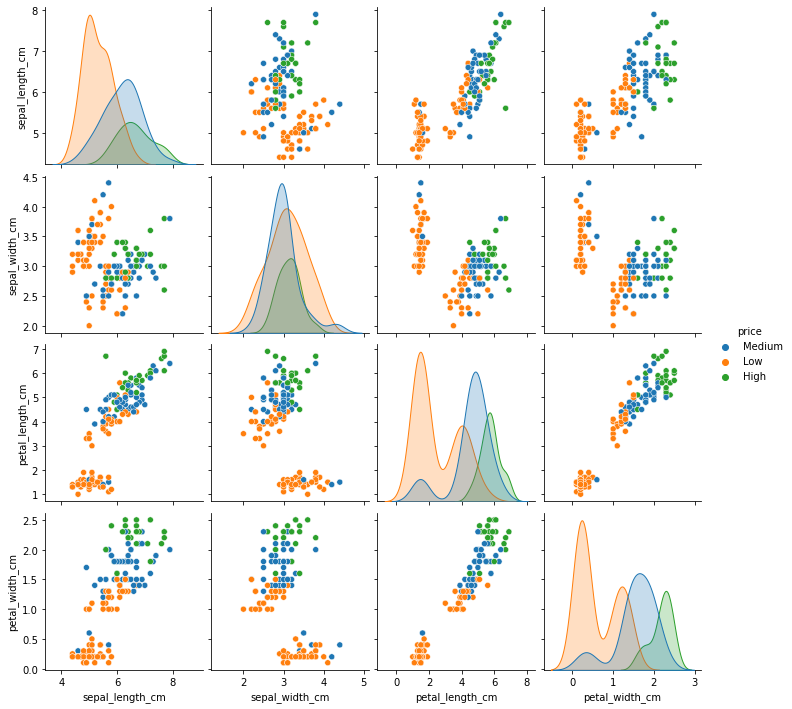

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(iris_filtered_data.dropna(), hue='price');

#### Get the values and the classification labels

In [31]:
# We can extract the data in this format from pandas like this:
all_inputs = iris_filtered_data[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

all_labels = iris_filtered_data['price'].values

#### Do the decision tree algorithm

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold
import numpy as np

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8176190476190476
Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 4, 'splitter': 'random'}


#### d) Analyse the accuracy, precision, recall and f-measure achieved.
#### e) Create and analyse a confusion matrix of the results.

In [42]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print(grid_search.scoring())


TypeError: 'NoneType' object is not callable